# 最小二乘线性回归

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
points = np.genfromtxt('data.csv',delimiter=',')
#points
#提取数据
x = points[:,0]
y = points[:,1]

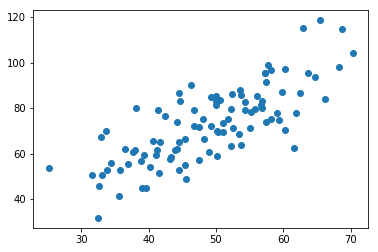

In [63]:
#散点图
plt.scatter(x,y)
plt.show()

In [64]:
#损失
def cost1(w,b,points):
    total_cost = 0
    M = len(points)
    
    #计算法平方误差
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost +=(y - x*w -b)**2
        
    return total_cost/M

In [65]:
#拟合函数
#样本均值
def average(data):
    sum=0
    for i in range(len(data)):
        sum += data[i]
    return sum/len(data)
#拟合
def fit(points):
    M = len(points)
    x_bar = average(points[:,0])
    
    sum_yx = 0
    sum_xx = 0
    sum_de = 0
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_yx += y*(x-x_bar)
        sum_xx += x**2
    #计算w
    w = sum_yx/(sum_xx - M*(x_bar)**2)
    #print(w)
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_de += (y-w*x)
    b = sum_de / M
    return w,b

In [66]:
#输出结果
w,b = fit(points)
print("w is :",w)
print("b is :",b)

cost = cost1(w,b,points)
print("cost is:",cost)

w is : 1.3224310227553846
b is : 7.991020982269173
cost is: 110.25738346621313


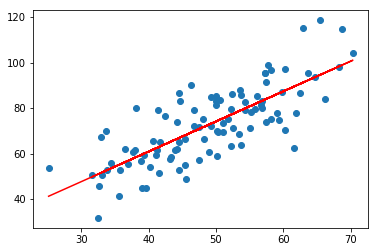

In [67]:
#拟合曲线
plt.scatter(x,y)
pred_y = w*x + b

plt.plot(x,pred_y,c='red')
plt.show()

# 梯度下降线性回归

In [68]:
 #数据同上，损失函数同为平方差，重新设计拟合
#定义超参数
alpha = 0.0001
init_w = 0
init_b = 0
num_iter = 20

In [69]:
#定义下降函数
def grad_desc(points,init_w,init_b,alpha,num_iter):
    w = init_w
    b = init_b
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append(cost1(w,b,points))
        w,b = step_grad_desc(w,b,alpha,points)
    return [w,b, cost_list]

def step_grad_desc(cur_w,cur_b,alpha,points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_grad_w+=(cur_w * x + b - y) * x 
        sum_grad_b+=(cur_w * x + b - y)
    #求梯度
    grad_w = 2/M * sum_grad_w
    grad_b = 2/M * sum_grad_b
    cur_w -= alpha*grad_w
    cur_b -= alpha*grad_b
    return cur_w,cur_b

w is : 1.4788932922646816
b is : 0.030268935136245564
cost is: 112.64994461874397


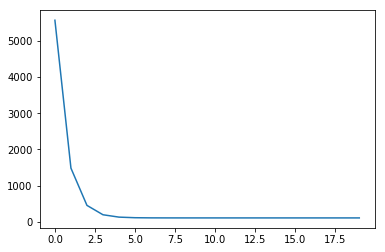

In [74]:
#计算结果
w, b, cost_list = grad_desc(points,init_w,init_b,alpha,num_iter)
print("w is :",w)
print("b is :",b)

cost = cost1(w,b,points)
print("cost is:",cost)

plt.plot(cost_list)
plt.show()


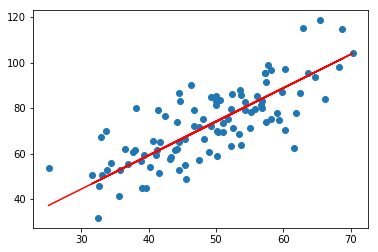

In [72]:
#拟合曲线
plt.scatter(x,y)
pred_y = w*x + b

plt.plot(x,pred_y,c='red')
plt.show()

# K近邻算法

In [76]:
import pandas as pd
#数据集iris鸢尾花
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
iris = load_iris()
df = pd.DataFrame(data=iris.data,columns = iris.feature_names)
df['class']=iris.target
df['class']=df['class'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [87]:
x = iris.data
y = iris.target.reshape(-1,1)
print(x.shape,y.shape)

(150, 4) (150, 1)


In [92]:
#分割数据
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=30,stratify=y)
print(train_x.shape,test_y.shape)

(105, 4) (45, 1)


In [102]:
#算法实现
def l1_distance(a,b):
    return np.sum(np.abs(a-b),axis=1)
def l2_distance(a,b):
    return np.sqrt(np.sum((a-b)**2),axis =1)

class kNN(object):
    def __init__(self,n_neighbors=1,dist_func=l1_distance):
        self.n_neighbors = n_neighbors
        self.dist_func = dist_func
        
    def fit(self,x,y):
        self.x_train = x
        self.y_train = y
        
    def predict(self,x):
        y_pred = np.zeros((x.shape[0],1),dtype = self.y_train.dtype)
        for i,x_test in enumerate(x):
            dis = self.dist_func(self.x_train,x_test)
            
            nn_index = np.argsort(dis)
            nn_y = self.y_train[nn_index[self.n_neighbors]].ravel()
            y_pred[i] = np.argmax(np.bincount(nn_y))
        
        return y_pred

In [103]:
#输出结果
knn = kNN(n_neighbors=3)
knn.fit(train_x,train_y)
y_pred=knn.predict(test_x)

acc = accuracy_score(test_y,y_pred)
print("acc:",acc)

acc: 0.9111111111111111
